In [18]:
# def a function evaluate the fitting goodness of dataset by Gpr model and LOOCV
import math
import warnings
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import LeaveOneOut
warnings.filterwarnings('ignore')

def eval_dataset(dataset):
    dataset = np.array(dataset)
    KErnel = RBF(length_scale_bounds = (1e-2, 1e2))
    X = dataset[:, :-1]
    Y = dataset[:, -1]
    loo = LeaveOneOut()
    y_pre_set = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, _ = Y[train_index], Y[test_index]
        Gpr_i = GaussianProcessRegressor(kernel=KErnel,
                                        normalize_y=True,
                                        alpha = 0.1,
                                        random_state=0).fit(X_train, y_train)

        y_pre = Gpr_i.predict(X_test, return_std=True)[0]
        y_pre_set.append(y_pre)
    Rvalue = PearsonR(y_pre_set, Y)
    return Rvalue


def PearsonR(X, Y):
    X = np.array(X)
    Y = np.array(Y)
    xBar = np.mean(X)
    yBar = np.mean(Y)
    SSR = 0
    varX = 0
    varY = 0
    for i in range(0, len(X)):
        diffXXBar = X[i] - xBar
        diffYYBar = Y[i] - yBar
        SSR += (diffXXBar * diffYYBar)
        varX += diffXXBar ** 2
        varY += diffYYBar ** 2
    SST = math.sqrt(varX * varY)

    return SSR / SST

In [19]:
eval_dataset(data)

array([0.83102127])

# LOF

In [20]:
import pandas as pd
import numpy as np
data = pd.read_csv('SACdataset.csv')

In [21]:
from sklearn.neighbors import LocalOutlierFactor
model = LocalOutlierFactor(n_neighbors=4, contamination=0.12,novelty=True)   
model.fit(data.iloc[:,:-1])

y = model._predict(data.iloc[:,:-1])
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1, -1,  1,  1,  1,  1,  1,  1])

In [22]:
index = np.where(y == -1)[0]
index

array([18, 19, 20])

In [23]:
for datum in range(len(index)):
    print('Outliers LOF : \n')
    print(data.iloc[index[datum],:],'\n')

Outliers LOF : 

Sn       86.8
Bi        5.5
In        5.5
Ti        0.7
Elong    11.8
Name: 18, dtype: float64 

Outliers LOF : 

Sn       86.90
Bi        5.50
In        5.40
Ti        0.70
Elong    13.69
Name: 19, dtype: float64 

Outliers LOF : 

Sn       86.90
Bi        5.50
In        5.50
Ti        0.60
Elong    12.64
Name: 20, dtype: float64 



In [24]:
data_removed = data.drop(index,axis = 0)
data_removed

,Sn,Bi,In,Ti,Elong
0,92.9,3.0,2.5,0.1,20.85
1,92.7,3.0,2.5,0.3,23.69
2,92.5,3.0,2.5,0.5,22.84
3,91.9,3.0,3.5,0.1,19.79
4,91.7,3.0,3.5,0.3,21.60
5,91.5,3.0,3.5,0.5,15.95
6,91.9,4.0,2.5,0.1,16.44
7,91.7,4.0,2.5,0.3,16.64
8,91.5,4.0,2.5,0.5,15.66
9,90.9,4.0,3.5,0.1,18.44


In [25]:
print(eval_dataset(data))
print(eval_dataset(data_removed))

[0.83102127]
[0.82297138]


# iForest

In [26]:
from sklearn.ensemble import IsolationForest 
clf = IsolationForest( max_samples=100,random_state=0, contamination=0.05)
clf.fit(data.iloc[:,:-1])
y_pre = clf.predict(data.iloc[:,:-1])
y_pre

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1])

In [27]:
index_2 = np.where(y_pre == -1)[0]
index_2

array([18, 19])

In [28]:
for datum in range(len(index_2)):
    print('Outliers LOF : \n')
    print(data.iloc[index_2[datum],:],'\n')

Outliers LOF : 

Sn       86.8
Bi        5.5
In        5.5
Ti        0.7
Elong    11.8
Name: 18, dtype: float64 

Outliers LOF : 

Sn       86.90
Bi        5.50
In        5.40
Ti        0.70
Elong    13.69
Name: 19, dtype: float64 



In [29]:
data_removed_2 = data.drop(index_2,axis = 0)
data_removed_2

,Sn,Bi,In,Ti,Elong
0,92.9,3.0,2.5,0.1,20.85
1,92.7,3.0,2.5,0.3,23.69
2,92.5,3.0,2.5,0.5,22.84
3,91.9,3.0,3.5,0.1,19.79
4,91.7,3.0,3.5,0.3,21.60
5,91.5,3.0,3.5,0.5,15.95
6,91.9,4.0,2.5,0.1,16.44
7,91.7,4.0,2.5,0.3,16.64
8,91.5,4.0,2.5,0.5,15.66
9,90.9,4.0,3.5,0.1,18.44


In [30]:
print(eval_dataset(data))
print(eval_dataset(data_removed_2))

[0.83102127]
[0.77700268]


# TCGPR

In [32]:
from TCGPR import TCGPR
dataSet = "SACdataset.csv"
sampling_cap = 1
# for fdata screening (backward)
# ratio is recommend as a float <= 0.01
ratio = 0.03
up_search = 100


TCGPR.fit(filePath = dataSet,Sequence = 'backward',
          sampling_cap = sampling_cap, ratio = ratio,alpha = 0.1)

Modle Data screening of backward searching is executed : param initial_set_cap is masked 
The first execution of TCGPR : Data screening; backward version
It a greedy searching strategy, since the sampling_cap is 1
1-th iteration : The newly removed datum is
[91.5   3.    3.5   0.5  15.95]
2-th iteration : The newly removed datum is
[92.4   1.5   4.5   0.1  18.81]
****************************************************************************************************
The dataset after data screening is : 
      Sn   Bi   In   Ti  Elong
0  91.5  3.0  3.5  0.5  15.95
1  92.4  1.5  4.5  0.1  18.81
The changes of fitting goodness is : 
 [0.8265671856267236, 0.8868780307171501, 0.9210525048343592]
The dataset after data screening has been saved successfully!
****************************************************************************************************
One conherenced dataset has been saved !


# Results

In [52]:
ori_data = np.array(data.iloc[:,1:4])

In [53]:
ori_data

array([[3. , 2.5, 0.1],
       [3. , 2.5, 0.3],
       [3. , 2.5, 0.5],
       [3. , 3.5, 0.1],
       [3. , 3.5, 0.3],
       [3. , 3.5, 0.5],
       [4. , 2.5, 0.1],
       [4. , 2.5, 0.3],
       [4. , 2.5, 0.5],
       [4. , 3.5, 0.1],
       [4. , 3.5, 0.3],
       [4. , 3.5, 0.5],
       [5. , 2.5, 0.1],
       [5. , 2.5, 0.3],
       [5. , 2.5, 0.5],
       [5. , 3.5, 0.1],
       [5. , 3.5, 0.3],
       [5. , 3.5, 0.5],
       [5.5, 5.5, 0.7],
       [5.5, 5.4, 0.7],
       [5.5, 5.5, 0.6],
       [2.5, 3.4, 0.1],
       [2.5, 3.3, 0.1],
       [2.5, 3.4, 0.2],
       [1.5, 4.5, 0.1],
       [1.5, 4.7, 0.1],
       [1.5, 4.4, 0.2]])

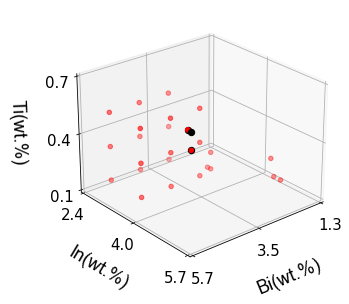

In [57]:

# 查看网格测试数据输出结果，并返回标准差。
font3 = {'family' : 'ARIAL',
'weight' : 'normal',
'size'   : 18,
}
from matplotlib.ticker import LinearLocator 
import matplotlib.pyplot as plt

#up, down = output * (1 + 1.96 * err), output * (1 - 1.96 * err)

 
# 作图，并画出

fig = plt.figure(figsize=(5, 5))
 
ax1 = fig.add_subplot(projection='3d')

ax1.scatter(ori_data[:,0], ori_data[:,1], ori_data[:,2], c='red',s=20)

ax1.scatter(ori_data[18,0], ori_data[18,1], ori_data[18,2], c='k',s=40)
ax1.scatter(ori_data[19,0], ori_data[19,1], ori_data[19,2], c='k',s=40)
ax1.scatter(ori_data[20,0], ori_data[20,1], ori_data[20,2], c='k',s=40)
 
#ax1.set_title('House Price at (2004, 98.31): {0:.2f}$*10^4$ RMB'.format(9))
ax1.elev = 25
ax1.azim = 50

ax1.set_xlabel('Bi(wt.%)',font3,labelpad=15)
ax1.set_ylabel('In(wt.%)',font3, labelpad=15)
ax1.set_zlabel('Ti(wt.%)',font3,labelpad=15)
plt.tick_params(labelsize=15)
plt.xticks(rotation=0)
ax1.xaxis.set_major_locator(LinearLocator(3))
ax1.yaxis.set_major_locator(LinearLocator(3))
ax1.zaxis.set_major_locator(LinearLocator(3))
ax1.zaxis.set_major_formatter('{x:.01f}')
ax1.xaxis.set_major_formatter('{x:.01f}')
ax1.yaxis.set_major_formatter('{x:.01f}')
#plt.tight_layout() 

plt.savefig('LOF.png',dpi=800)
plt.show()

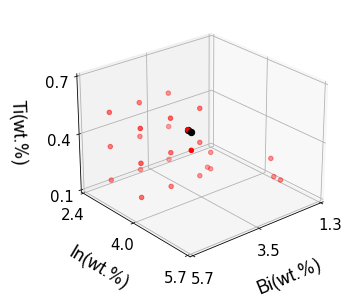

In [58]:

# 查看网格测试数据输出结果，并返回标准差。
font3 = {'family' : 'ARIAL',
'weight' : 'normal',
'size'   : 18,
}
from matplotlib.ticker import LinearLocator 
import matplotlib.pyplot as plt

#up, down = output * (1 + 1.96 * err), output * (1 - 1.96 * err)

 
# 作图，并画出

fig = plt.figure(figsize=(5, 5))
 
ax1 = fig.add_subplot(projection='3d')

ax1.scatter(ori_data[:,0], ori_data[:,1], ori_data[:,2], c='red',s=20)

ax1.scatter(ori_data[18,0], ori_data[18,1], ori_data[18,2], c='k',s=40)
ax1.scatter(ori_data[19,0], ori_data[19,1], ori_data[19,2], c='k',s=40)

 
#ax1.set_title('House Price at (2004, 98.31): {0:.2f}$*10^4$ RMB'.format(9))
ax1.elev = 25
ax1.azim = 50

ax1.set_xlabel('Bi(wt.%)',font3,labelpad=15)
ax1.set_ylabel('In(wt.%)',font3, labelpad=15)
ax1.set_zlabel('Ti(wt.%)',font3,labelpad=15)
plt.tick_params(labelsize=15)
plt.xticks(rotation=0)
ax1.xaxis.set_major_locator(LinearLocator(3))
ax1.yaxis.set_major_locator(LinearLocator(3))
ax1.zaxis.set_major_locator(LinearLocator(3))
ax1.zaxis.set_major_formatter('{x:.01f}')
ax1.xaxis.set_major_formatter('{x:.01f}')
ax1.yaxis.set_major_formatter('{x:.01f}')
#plt.tight_layout() 

plt.savefig('iForest.png',dpi=800)
plt.show()

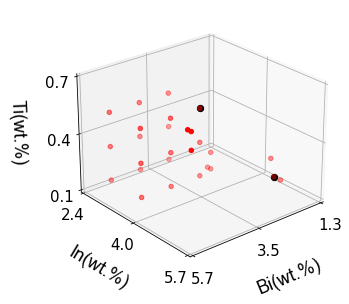

In [59]:

# 查看网格测试数据输出结果，并返回标准差。
font3 = {'family' : 'ARIAL',
'weight' : 'normal',
'size'   : 18,
}
from matplotlib.ticker import LinearLocator 
import matplotlib.pyplot as plt

#up, down = output * (1 + 1.96 * err), output * (1 - 1.96 * err)

 
# 作图，并画出

fig = plt.figure(figsize=(5, 5))
 
ax1 = fig.add_subplot(projection='3d')

ax1.scatter(ori_data[:,0], ori_data[:,1], ori_data[:,2], c='red',s=20)

ax1.scatter(ori_data[24,0], ori_data[24,1], ori_data[24,2], c='k',s=40)
ax1.scatter(ori_data[5,0], ori_data[5,1], ori_data[5,2], c='k',s=40)

 
#ax1.set_title('House Price at (2004, 98.31): {0:.2f}$*10^4$ RMB'.format(9))
ax1.elev = 25
ax1.azim = 50

ax1.set_xlabel('Bi(wt.%)',font3,labelpad=15)
ax1.set_ylabel('In(wt.%)',font3, labelpad=15)
ax1.set_zlabel('Ti(wt.%)',font3,labelpad=15)
plt.tick_params(labelsize=15)
plt.xticks(rotation=0)
ax1.xaxis.set_major_locator(LinearLocator(3))
ax1.yaxis.set_major_locator(LinearLocator(3))
ax1.zaxis.set_major_locator(LinearLocator(3))
ax1.zaxis.set_major_formatter('{x:.01f}')
ax1.xaxis.set_major_formatter('{x:.01f}')
ax1.yaxis.set_major_formatter('{x:.01f}')
#plt.tight_layout() 
plt.savefig('TCGPR.png',dpi=800)
plt.show()